# **Cleaning Data**

In [6]:
import pandas as pd
import os
import re
import string

In [7]:
# RUN THIS JUST TO CONCATE ALL THE DATASET TOGETHER
data = []
BASE ='Datasets/'
for file in os.listdir(BASE):
    if file != 'concatenated' and file != 'labeled':
        data.append(pd.read_csv(BASE+file))
df = pd.concat([x for x in data])

df.to_csv(BASE+'concatenated/full_tweetdata.csv', index=False)

In [8]:
# func to remove unnecessary text patterns
def remove_link(text):
    return re.sub(r"https.*$", '', text)
def remove_account(text):
    return re.sub(r"@\S*", '', text)
def remove_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation)).rstrip()
def remove_certain_emoji(text):
    emoji = r"‍💨|😀|😃|😄|😁|😆|😅|🤣|😂|🙂|🙃|🫠|😉|😊|😇|🥰|😍|🤩|😘|😗|☺️|😚|😙|🥲|😋|😛|😜|🤪|😝|🤑|🤗|🤭|🫢|🫣|🤫|🤔|🫡|🤐|🤨|😐|😑|😶|🫥|😶|😏|😒|🙄|😬|😮|🤥|😌|😔|😪|🤤|😴|😷|🤒|🤕|🤢|🤮|🤧|🥵|🥶|🥴|😵|😵|🤯|🤠|🥳|🥸|😎|🤓|🧐|😕|🫤|😟|🙁|☹️|😮|😯|😲|😳|🥺|🥹|😦|😧|😨|😰|😥|😢|😭|😱|😖|😣|😞|😓|😩|😫|🥱|😤|😡|😠|🤬|😈|👿|💀|☠️|💩|🤡|👹|👺|👻|👽|👾|🤖|😺|😸|😹|😻|😼|😽|🙀|😿|😾|💋|👋|🤚|🖐|✋ |🖖|🫱|🫲|🫳|🫴|👌|🤌|🤏|✌️|🤞|🫰|🤟|🤘|🤙|👈|👉|👆|🖕|👇|☝️|🫵|👍|👎|✊ |👊|🤛|🤜|👏|🙌|🫶|👐|🤲|🤝|🙏|✍️|💅|🤳|💪|🦾|🦿|🦵|🦶|👂|🦻|👃|🧠|🫀|🫁|🦷|🦴|👀|👁|👅|👄|🫦|👶|🧒|👦|👧|🧑|👱|👨|🧔|👨|👨|👨|👨|👩|👩|🧑|👩|🧑|👩|🧑|👩|🧑|👱|👱|🧓|👴|👵|🙍|🙍|🙍|🙎|🙎|🙎|🙅|🙅|🙅|🙆|🙆|🙆|💁|💁|💁|🙋|🙋|🙋|🧏|🧏|🧏|🙇|🙇|🙇|🤦|🤦|🤦|🤷|🤷|🤷|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|👮|👮|👮|🕵|🕵|🕵|💂|💂|💂|🥷|👷|👷|👷|🫅|🤴|👸|👳|👳|👳|👲|🧕|🤵|🤵|🤵|👰|👰|👰|🤰|🫃|🫄|🤱|👩|👨|🧑|👼|🎅|🤶|🧑|🦸|🦸|🦸|🦹|🦹|🦹|🧙|🧙|🧙|🧚|🧚|🧚|🧛|🧛|🧛|🧜|🧜|🧜|🧝|🧝|🧝|🧞|🧞|🧞|🧟|🧟|🧟|🧌|💆|💆|💆|💇|💇|💇|🚶|🚶|🚶|🧍|🧍|🧍|🧎|🧎|🧎|🧑|👨|👩|🧑|👨|👩|🧑|👨|👩|🏃|🏃|🏃|💃|🕺|🕴|👯|👯|👯|🧖|🧖|🧖|🧘|🧑|👭|👫|👬|💏|👩|👨|👩|💑|👩|👨|👩|👪|👨|👨|👨|👨|👨|👨|👨|👨|👨|👨|👩|👩|👩|👩|👩|👨|👨|👨|👨|👨|👩|👩|👩|👩|👩|🗣|👤|👥|🫂|👣|🧳|🌂|☂️|🎃|🧵|🧶|👓|🕶|🥽|🥼|🦺|👔|👕|👖|🧣|🧤|🧥|🧦|👗|👘|🥻|🩱|🩲|🩳|👙|👚|👛|👜|👝|🎒|🩴|👞|👟|🥾|🥿|👠|👡|🩰|👢|👑|👒|🎩|🎓|🧢|🪖|⛑️|💄|💍|💼|🩸"
    return re.sub(emoji, '', text).rstrip()
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
def remove_rt_tag(text):
    return re.sub(r"^RT.*:", '', text).lstrip()
def remove_hash_tag(text):
    return re.sub(r"(#\S+\s?)", '', text).lstrip().rstrip()
def remove_char(text):
    return text.replace('\r', '').replace('\n', '')
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)|^RT|http.+?", "", elem))
    return df

Cleaning data (Stemming & Stopwords)

In [9]:
# !pip install ntlk

In [10]:
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [13]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [12]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [18]:
%%time
def clean_all(df):
    df_clean = df
    df_clean['texts'] = [remove_account(x) for x in df_clean['texts']]
    df_clean['texts'] = [remove_link(x) for x in df_clean['texts']]
    df_clean['texts'] = [remove_certain_emoji(x) for x in df_clean['texts']]
    df_clean['texts'] = [remove_emojis(x) for x in df_clean['texts']]
    df_clean['texts'] = [remove_rt_tag(x) for x in df_clean['texts']]
    df_clean['texts'] = [remove_hash_tag(x) for x in df_clean['texts']]
    df_clean['texts'] = [remove_punc(x) for x in df_clean['texts']]
    df_clean['texts'] = [remove_char(x) for x in df_clean['texts']]
    df_clean['texts'] = [x.lower() for x in df_clean['texts']]
    df_clean.texts = df_clean.texts.apply(lambda x: preprocess(x))
    df_clean.head(10)
    return df_clean

CPU times: total: 0 ns
Wall time: 0 ns


In [5]:
df = pd.read_csv(BASE+'concatenated/full_tweetdata.csv')
df.head(5)

,texts,created_at,location
0,@vaarufj @KonstantinKisin The hostility is war...,2022-10-03,Noemaville
1,"@rohini_sgh The reference of ""hate"" never seem...",2022-10-03,NaN
2,I love edits of Goku where he's muslim,2022-10-03,NaN
3,@KFILE A 1400-year-old secret about Pakistan –...,2022-10-03,NaN
4,This is facts. The narrative is “Islam hasn’t ...,2022-10-03,"Bronx, NY"


Data tweet (Unlabeled)

In [1]:
# USE THIS INSTEAD
df = pd.read_csv(BASE+'concatenated/full_tweetdata.csv')
# CLEAN LOCATION VALUE
countries = """AF|Afghanistan
AL|Albania
DZ|Algeria
AS|American Samoa
AD|Andorra
AO|Angola
AI|Anguilla
AQ|Antarctica
AG|Antigua And Barbuda
AR|Argentina
AM|Armenia
AW|Aruba
AU|Australia
AT|Austria
AZ|Azerbaijan
BS|Bahamas
BH|Bahrain
BD|Bangladesh
BB|Barbados
BY|Belarus
BE|Belgium
BZ|Belize
BJ|Benin
BM|Bermuda
BT|Bhutan
BO|Bolivia
BA|Bosnia And Herzegovina
BW|Botswana
BV|Bouvet Island
BR|Brazil
IO|British Indian Ocean Territory
BN|Brunei Darussalam
BG|Bulgaria
BF|Burkina Faso
BI|Burundi
KH|Cambodia
CM|Cameroon
CA|Canada
CV|Cape Verde
KY|Cayman Islands
CF|Central African
TD|Chad
CL|Chile
CN|China
CX|Christmas Island
CC|Cocos (keeling) Islands
CO|Colombia
KM|Comoros
CG|Congo
CD|Congo
CK|Cook Islands
CR|Costa Rica
CI|Cote D'ivoire
HR|Croatia
CU|Cuba
CY|Cyprus
CZ|Czech Republic
DK|Denmark
DJ|Djibouti
DM|Dominica
DO|Dominican Republic
TP|East Timor
EC|Ecuador
EG|Egypt
SV|El Salvador
GQ|Equatorial Guinea
ER|Eritrea
EE|Estonia
ET|Ethiopia
FK|Falkland
FO|Faroe
FJ|Fiji
FI|Finland
EN|England
FR|France
GF|French
GA|Gabon
GM|Gambia
GE|Georgia
DE|Germany
GH|Ghana
GI|Gibraltar
GR|Greece
GL|Greenland
GD|Grenada
GP|Guadeloupe
GU|Guam
GT|Guatemala
GN|Guinea
GW|Guinea-bissau
GY|Guyana
HT|Haiti
HM|Heard Island And Mcdonald Islands
VA|Vatican
HN|Honduras
HK|Hong Kong
HU|Hungary
IS|Iceland
IN|India
ID|Indonesia
IR|Iran
IQ|Iraq
IE|Ireland
IL|Israel
IT|Italy
JM|Jamaica
JP|Japan
JO|Jordan
KZ|Kazakstan
KE|Kenya
KI|Kiribati
KP|Korea
KR|Korea
KV|Kosovo
KW|Kuwait
KG|Kyrgyzstan
LA|Lao People's Democratic Republic
LV|Latvia
LB|Lebanon
LS|Lesotho
LR|Liberia
LY|Libyan Arab Jamahiriya
LI|Liechtenstein
LT|Lithuania
LU|Luxembourg
MO|Macau
MK|Macedonia
MG|Madagascar
MW|Malawi
MY|Malaysia
MV|Maldives
ML|Mali
MT|Malta
MH|Marshall Islands
MQ|Martinique
MR|Mauritania
MU|Mauritius
YT|Mayotte
MX|Mexico
FM|Micronesia
MD|Moldova
MC|Monaco
MN|Mongolia
MS|Montserrat
ME|Montenegro
MA|Morocco
MZ|Mozambique
MM|Myanmar
NA|Namibia
NR|Nauru
NP|Nepal
NL|Netherlands
AN|Netherlands Antilles
NC|New Caledonia
NZ|New Zealand
NI|Nicaragua
NG|Nigeria
NU|Niue
NF|Norfolk Island
MP|Northern Mariana Islands
NO|Norway
OM|Oman
PK|Pakistan
PW|Palau
PS|Palestine
PA|Panama
PG|Papua New Guinea
PY|Paraguay
PE|Peru
PH|Philippines
PN|Pitcairn
PL|Poland
PT|Portugal
PR|Puerto Rico
QA|Qatar
RE|Reunion
RO|Romania
RU|Russian Federation
RW|Rwanda
SH|Saint Helena
KN|Saint Kitts And Nevis
LC|Saint Lucia
PM|Saint Pierre And Miquelon
VC|Saint Vincent And The Grenadines
WS|Samoa
SM|San Marino
ST|Sao Tome And Principe
SA|Saudi Arabia
SN|Senegal
RS|Serbia
SC|Seychelles
SL|Sierra Leone
SG|Singapore
SK|Slovakia
SI|Slovenia
SB|Solomon Islands
SO|Somalia
ZA|South Africa
GS|South Georgia And The South Sandwich Islands
ES|Spain
LK|Sri Lanka
SD|Sudan
SR|Suriname
SJ|Svalbard And Jan Mayen
SZ|Swaziland
SE|Sweden
CH|Switzerland
SY|Syrian Arab Republic
TW|Taiwan
TJ|Tajikistan
TZ|Tanzania
TH|Thailand
TG|Togo
TK|Tokelau
TO|Tonga
TT|Trinidad And Tobago
TN|Tunisia
TR|Turkey
TM|Turkmenistan
TC|Turks And Caicos Islands
TV|Tuvalu
UG|Uganda
UA|Ukraine
AE|United Arab Emirates
UK|United Kingdom
US|United States
UY|Uruguay
UZ|Uzbekistan
VU|Vanuatu
VE|Venezuela
VN|Viet Nam
VG|Virgin Islands
WF|Wallis And Futuna
EH|Western Sahara
YE|Yemen
ZM|Zambia
ZW|Zimbabwe"""
countries = [e[3:] for e in countries.split("\n")]
for each in countries:
    df.loc[df['location'].str.contains(each, case=False, na=False), 'location'] = each

NameError: name 'pd' is not defined

In [20]:
occur = df['location'].value_counts(dropna=False)
occur.head(20)

NaN                 9684
Nigeria              634
India                616
England              570
Pakistan             391
Indonesia            252
Canada               218
United States        201
Australia            181
United Kingdom       156
UAE                   95
USA                   93
London                77
Toronto, Ontario      77
Bangladesh            68
Tunisia               67
UK                    65
Los Angeles, CA       64
Uni Emirat Arab       57
Washington, DC        54
Name: location, dtype: int64

In [21]:
df = clean_all(df)
df.to_csv(BASE+'concatenated/clean_full_tweetdata.csv', index = False)

Labeled sentiment data

In [25]:
# Jalanin ini kalau mau membersihkan data yang sudah di labeli
df = pd.read_csv("Datasets/labeled/labeled_data_tweet.csv")
df.rename(columns={'clean_text': 'texts'}, inplace=True)
df

,texts,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [28]:
df.dropna(inplace=True)
df.isnull().sum()

texts       0
category    0
dtype: int64

In [29]:
df = clean_all(df)
df.to_csv(BASE+'labeled/clean_labeled_data_tweet.csv', index = False)

Bawah ini keknya ga guna

In [ ]:
# for i in range(100):
#     print(df.iloc(0)[i][1])

barusan lihat tulisan truk rela injek kopling belanja
her lo miss kevin keven berebut gimbot ya beli 2 the kembar asyik main ipad masin
iya rep tau kelas 4 sekolah dasar eh blok
mohon tepatilah janjimu penantiancintaeps19
beria natural killer kahwin gatal celah kangkang penat kg orang anggap nih bujang kerja and ser
ingatkan habanero pedas 10 kali ganda pedas gila
tengok drama cinta kristalatu conversation anak iyeee perempuan
butuh interaksi 95l 99l yuk line ayo mutualan ku follow auto ikuti oke rt
streak
nunggun video nih retweet full
kisah bf adek kawan perempuan adek kawan laki over nak mengadu nak cite send
high
malam undangan opening hungerbelt spazio temani laaaahhh siiisssss

ramai sifu2 properti approach join kelas investment etcemua cerita beli rumah murah sewakan
lecturer suruh tampal note kat tengok nak tampal kat muka crush
20thn nikah umur 23 orang 23thn nglamar 24thn sih
terdengar perbualan budak sekolah natural killer amik a level natural killer amik asasi asasi oke mat

In [ ]:
# df.dropna(inplace=True)

In [ ]:
# df.isnull().sum()

sentimen    0
texts       0
dtype: int64

In [ ]:
# result = df.sentimen.value_counts().reset_index(name='count')

0    0.0
1    2.0
2    1.0
Name: index, dtype: float64


In [ ]:
# import matplotlib.pyplot as plt

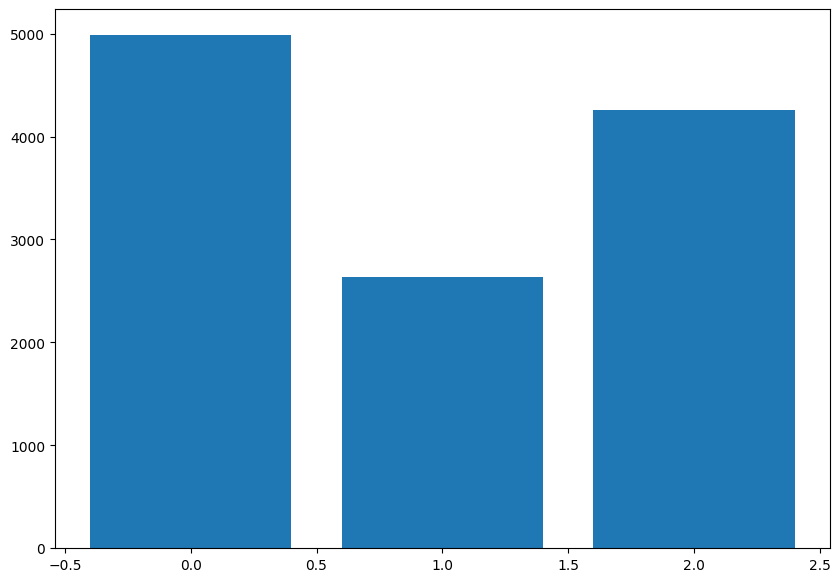

In [ ]:
# # Figure Size
# fig = plt.figure(figsize =(10, 7))
 
# # Horizontal Bar Plot
# plt.bar(result['index'], result['count'])
 
# # Show Plot
# plt.show()